# Introduction to Pandas 

### Matias Bayas-Erazo

This notebook introduces the basic methods and functions of the pandas package, very popular for data analysis.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests

s = pd.Series(np.random.randn(4), name = 'Daily Returns')
s.describe()

count    4.000000
mean     0.158160
std      1.109902
min     -0.949387
25%     -0.419689
50%     -0.047647
75%      0.530202
max      1.677321
Name: Daily Returns, dtype: float64

Series are one of the main data types included in the pandas package. They support the same operations as np.arrays and some more statistics oriented operations. Also, the use of indices is more flexible and can be used to manipulate the series:


In [48]:
s.index = ['AMZN', 'AAPL', 'MSFT', 'GOOG']
s['AMZN'] = 0
s

AMZN    0.000000
AAPL   -0.985240
MSFT   -0.094834
GOOG    1.573633
Name: Daily Returns, dtype: float64

While a Series is a single column of data, a DataFrame contains several columns, one for each variable. Here is an example of the operations one can make on a DataFrame using the file "test_pwt.csv"


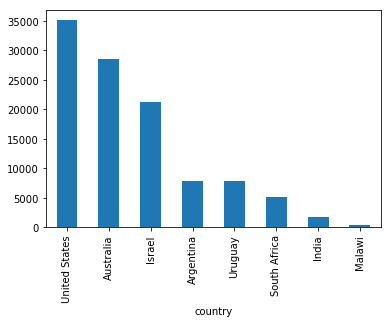

In [33]:
df = pd.read_csv('test_pwt.csv') # Reads in the file.

df[2:5] # Returns 3 rows starting at the second one

df[['country','tcgdp']] # Select particular columns by passing list with column names

# To select rows and columns using integers use the iloc attribute, format is .iloc[rows,cols]
df.iloc[2:5,0:4]

# To select rows and columns using a mixture of integers and labels use the loc attribute, 
# format is .iloc[rows,cols]
df.loc[df.index[2:5], ['country','tcgdp']]

# Now suppose we are only interested in population and total GDP, we can extract as follows:
df = df[['country','POP','tcgdp']]

# The index 0,...,7 is redundant becuase we can use country names as index, so we remove them:
df = df.set_index('country')
df

# Give columns better names:
df.columns = 'Population', 'Total GDP'
df

# Revert population back to single units as it is in thousands:
df['Population'] = df['Population'] * 1e3
df

# Compute GDP per capita, multiplying GDP * million because it is in millions:
df['GDP per Capita'] = df['Total GDP']*1e6/df['Population']

# Change the ordering from alphabetical to GDP per capita
df = df.sort_values(by = 'GDP per Capita', ascending = False)

# We can easily generate a bar plot of GDP per capita:
df['GDP per Capita'].plot(kind = 'bar')
plt.show()

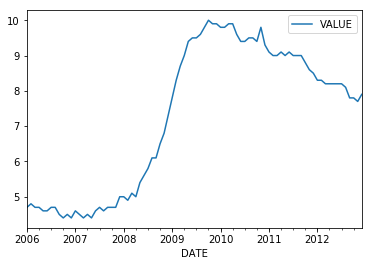

In [47]:
# Acessing online data sources with Pandas (FRED Unemployment Data)

# Panda's read.csv function can handle this easily:
data = pd.read_csv(url, index_col = 0, parse_dates = True) 
# parse_dates = True allows pandas to recognize dates column, allowing simple date filtering

data.head()  # A useful method to get a quick look at a data frame

# We can plot the unemployment rate from 2006 to 2012 as follows:
data['2006':'2012'].plot()
plt.show()


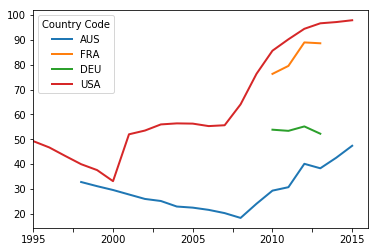

In [55]:
# Accessing World Bank Data with Pandas. This program downloads data on central govt debt from
# the World Bank in Excel format stores it in the file gd.xls, reads it into a panda data frame
# and plots a time series for certain countries.

# Get data and read into file gd.xls 
wb_data_query = "http://api.worldbank.org/v2/en/indicator/gc.dod.totl.gd.zs?downloadformat=excel"
r = requests.get(wb_data_query)
with open('gd.xls', 'wb') as output:
    output.write(r.content)
    
govt_debt = pd.read_excel('gd.xls', sheetname = 'Data', skiprows = 3, index_col = 1)
govt_debt = govt_debt.transpose()
govt_debt = govt_debt[['AUS', 'FRA', 'DEU', 'USA']]
govt_debt = govt_debt[38:]
govt_debt.plot(lw=2)
plt.show()
